In [3]:
!pip install control

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 578.3/578.3 kB 6.3 MB/s eta 0:00:00


Plant (Gps) Kelompok 3: <TransferFunction>: sys[0]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

          1.2
  --------------------
  0.04 s^2 + 0.5 s + 1
Memulai Algoritma Genetik...
Generasi 0: Fitness Terbaik = 0.989146
Generasi 5: Fitness Terbaik = 0.989146
Generasi 10: Fitness Terbaik = 0.989146
Generasi 15: Fitness Terbaik = 0.989146
Generasi 20: Fitness Terbaik = 0.989146
Generasi 25: Fitness Terbaik = 0.989146
Generasi 30: Fitness Terbaik = 0.989146
Generasi 35: Fitness Terbaik = 0.989146
Generasi 40: Fitness Terbaik = 0.989146
Generasi 45: Fitness Terbaik = 0.989146
Optimasi GA Selesai.


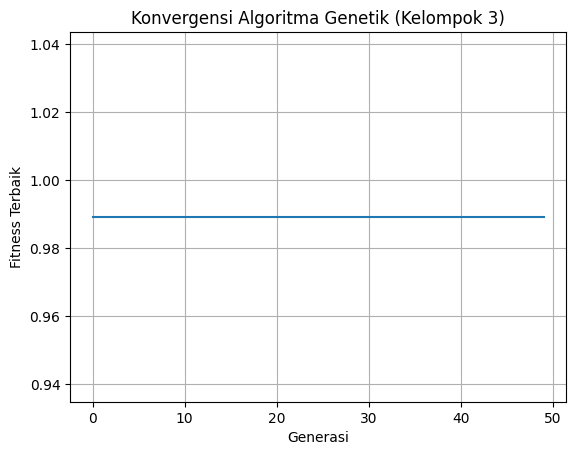

In [4]:
import numpy as np
import control as ct
import matplotlib.pyplot as plt

# --- 1. DEFINISI SISTEM (PLANT) UNTUK KELOMPOK 3 ---
# [cite: 20] Fungsi Alih Kelompok 3:
# K=1.2, tau1=0.1, tau2=0.4
# Gps = 1.2 / (0.04s^2 + 0.5s + 1)
num_gps = [1.2]
den_gps = [0.04, 0.5, 1.0]
Gps = ct.tf(num_gps, den_gps)

print(f"Plant (Gps) Kelompok 3: {Gps}")

# --- 2. PARAMETER ALGORITMA GENETIK (Contoh) ---
# Anda harus menyesuaikan nilai-nilai ini
UKURAN_POPULASI = 50
JUMLAH_GENERASI = 50
PROB_CROSSOVER = 0.8
PROB_MUTASI = 0.1

# [cite: 33] Tentukan batas (range) pencarian [Kp, Ki, Kd]
# Format: [ [Kp_min, Kp_max], [Ki_min, Ki_max], [Kd_min, Kd_max] ]
BATAS_GEN = [
    [0.10, 80.0],  # Batas Kp
    [0.10, 20.0],   # Batas Ki
    [0.10, 5.0]    # Batas Kd
]

# --- 3. FUNGSI FITNESS (FUNGSI OBJEKTIF) ---
# [cite: 35] Ini adalah inti dari evaluasi GA
# Fungsi ini menerima 1 kromosom [Kp, Ki, Kd] dan mengembalikan nilai fitness

def hitung_fitness(kromosom):
    Kp, Ki, Kd = kromosom

    # 1. Definisikan Kontroler PID (Perbaikan dari error sebelumnya)
    num_gc = [Kd, Kp, Ki]
    den_gc = [1.0, 0.0]
    Gcs = ct.tf(num_gc, den_gc)

    try:
        # 2. Bentuk Sistem Closed-Loop
        T_s = ct.feedback(Gcs * Gps, 1) # <--- Perhatikan indentasi di sini

        # 3. Jalankan Simulasi Respons Step
        T_sim = np.linspace(0, 10, 1000)
        T_sim, yout = ct.step_response(T_s, T_sim)

        # 4. Hitung Cost (ISE)
        error = 1.0 - yout
        cost = np.sum(error**2) * (T_sim[1] - T_sim[0])

        # 5. Hitung Fitness
        fitness = 1.0 / (1.0 + cost) # <--- Perhatikan indentasi di sini

    except ValueError:
        # Menangani jika sistem tidak stabil
        fitness = 0.0 # <--- Perhatikan indentasi di sini

    return fitness # <--- Ini harus pada level indentasi yang sama dengan try/except

# --- 4. FUNGSI INISIALISASI POPULASI ---
def buat_populasi_awal(ukuran_populasi, batas_gen):
    """
    Membuat populasi awal secara acak berdasarkan batas gen.
    [cite: 44]
    """
    populasi = []
    for _ in range(ukuran_populasi):
        kromosom = [
            np.random.uniform(batas_gen[0][0], batas_gen[0][1]), # Kp
            np.random.uniform(batas_gen[1][0], batas_gen[1][1]), # Ki
            np.random.uniform(batas_gen[2][0], batas_gen[2][1])  # Kd
        ]
        populasi.append(kromosom)
    return populasi

# --- 5. SIKLUS UTAMA ALGORITMA GENETIK (HARUS DIIMPLEMENTASIKAN) ---
#  Ini adalah bagian yang harus Anda kerjakan

print("Memulai Algoritma Genetik...")

# A. Inisialisasi [cite: 44]
populasi = buat_populasi_awal(UKURAN_POPULASI, BATAS_GEN)
riwayat_fitness_terbaik = [] # Untuk plot konvergensi [cite: 67]

# Loop per Generasi [cite: 50]
for gen in range(JUMLAH_GENERASI):

    # B. Evaluasi [cite: 45]
    list_fitness = []
    for kromosom in populasi:
        list_fitness.append(hitung_fitness(kromosom))

    # C. Elitisme [cite: 49]
    # Simpan kromosom terbaik dari generasi ini
    # (Implementasikan logika untuk menemukan dan menyimpan 'n' elit terbaik)

    # D. Seleksi [cite: 46]
    # Pilih orang tua dari populasi berdasarkan fitness
    # (Implementasikan metode, misal: Roulette Wheel atau Tournament Selection)

    # E. Crossover (Pindah Silang) [cite: 47]
    # Hasilkan 'anak' baru dari 'orang tua' terpilih
    # (Implementasikan metode, misal: Blend Crossover atau Single-point)

    # F. Mutasi [cite: 48]
    # Terapkan mutasi acak pada beberapa 'anak'
    # (Implementasikan metode, misal: Gaussian Mutation)

    # G. Bentuk Populasi Baru
    # Populasi generasi berikutnya = (Elit) + (Anak hasil Crossover/Mutasi)

    # ----------------------------------------------------
    # Catat fitness terbaik untuk plot konvergensi
    fitness_terbaik_gen = np.max(list_fitness)
    riwayat_fitness_terbaik.append(fitness_terbaik_gen)

    if (gen % 5 == 0): # Cetak progres setiap 5 generasi
        print(f"Generasi {gen}: Fitness Terbaik = {fitness_terbaik_gen:.6f}")

# --- 6. HASIL AKHIR ---
print("Optimasi GA Selesai.")

# Temukan kromosom terbaik dari populasi final
# (Implementasikan logika untuk menemukan kromosom dengan fitness tertinggi)
# kromosom_terbaik = ...
# Kp_opt, Ki_opt, Kd_opt = kromosom_terbaik

# print(f"Parameter PID Optimal: Kp={Kp_opt}, Ki={Ki_opt}, Kd={Kd_opt}")

# --- 7. PLOTTING (ANALISIS) ---
# [cite: 67] Plot Konvergensi GA
plt.figure()
plt.plot(range(JUMLAH_GENERASI), riwayat_fitness_terbaik)
plt.title("Konvergensi Algoritma Genetik (Kelompok 3)")
plt.xlabel("Generasi")
plt.ylabel("Fitness Terbaik")
plt.grid(True)
plt.show()

#  Plot Perbandingan Respons Step
# (Anda perlu menambahkan kode untuk plotting perbandingan
# antara hasil GA dengan hasil Ziegler-Nichols)

Memulai Algoritma Genetik...
Generasi 1: Fitness Terbaik = 0.989939
Generasi 5: Fitness Terbaik = 0.989997
Generasi 10: Fitness Terbaik = 0.990010
Generasi 15: Fitness Terbaik = 0.990012
Generasi 20: Fitness Terbaik = 0.990012
Generasi 25: Fitness Terbaik = 0.990012
Generasi 30: Fitness Terbaik = 0.990012
Generasi 35: Fitness Terbaik = 0.990012
Generasi 40: Fitness Terbaik = 0.990012
Generasi 45: Fitness Terbaik = 0.990012
Generasi 50: Fitness Terbaik = 0.990012
Optimasi GA Selesai.

Parameter PID Optimal (Hasil GA):
Kp=100.0000, Ki=50.0000, Kd=10.0000


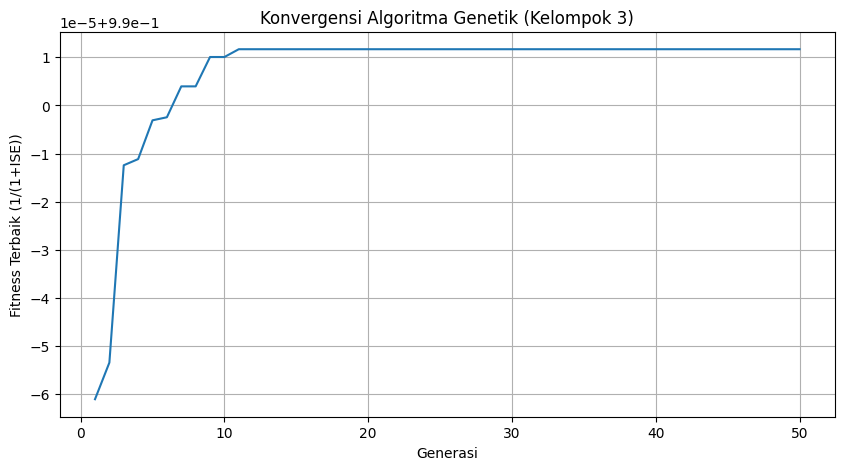

In [5]:
import numpy as np
import control as ct
import matplotlib.pyplot as plt
import random

# --- 1. DEFINISI SISTEM (PLANT) UNTUK KELOMPOK 3 ---
# Gps = 1.2 / (0.04s^2 + 0.5s + 1)
num_gps = [1.2]
den_gps = [0.04, 0.5, 1.0]
Gps = ct.tf(num_gps, den_gps)

# --- 2. PARAMETER ALGORITMA GENETIK ---
UKURAN_POPULASI = 50
JUMLAH_GENERASI = 50
PROB_CROSSOVER = 0.8
PROB_MUTASI = 0.1
UKURAN_TURNAMEN = 5 # Untuk Seleksi

# Tentukan batas (range) pencarian [Kp, Ki, Kd]
BATAS_GEN = [
    [0.0, 100.0],  # Kp
    [0.0, 50.0],   # Ki
    [0.0, 10.0]    # Kd
]

# --- 3. FUNGSI FITNESS (SUDAH DIPERBAIKI) ---
def hitung_fitness(kromosom):
    Kp, Ki, Kd = kromosom

    # 1. Bangun Kontroler PID Gc(s) = (Kd*s^2 + Kp*s + Ki) / s
    num_gc = [Kd, Kp, Ki]
    den_gc = [1.0, 0.0]  # s
    Gcs = ct.tf(num_gc, den_gc)

    try:
        # 2. Bentuk Sistem Closed-Loop
        T_s = ct.feedback(Gcs * Gps, 1)

        # 3. Jalankan Simulasi Respons Step (rentang 10 detik)
        T_sim = np.linspace(0, 10, 1000)
        T_sim, yout = ct.step_response(T_s, T_sim)

        # 4. Hitung Cost (ISE - Integral of Squared Error)
        error = 1.0 - yout
        cost = np.sum(error**2) * (T_sim[1] - T_sim[0])

        # 5. Hitung Fitness (Minimalkan Cost)
        fitness = 1.0 / (1.0 + cost)

    except (ValueError, IndexError):
        # Tangani jika sistem tidak stabil atau error simulasi
        fitness = 0.0

    return fitness

# --- 4. OPERASI GENETIK ---

# C.1. SELEKSI (Tournament Selection)
def seleksi_turnamen(populasi, list_fitness, ukuran_turnamen):
    """Memilih satu individu terbaik dari sekelompok acak."""
    indeks_terpilih = random.choices(range(len(populasi)), k=ukuran_turnamen)

    # Cari indeks dengan fitness terbaik di antara yang terpilih
    fitness_terbaik = -1
    pemenang_indeks = -1
    for i in indeks_terpilih:
        if list_fitness[i] > fitness_terbaik:
            fitness_terbaik = list_fitness[i]
            pemenang_indeks = i

    return populasi[pemenang_indeks]

# C.2. CROSSOVER (Single-Point Crossover)
def crossover(parent1, parent2, prob_crossover):
    anak1 = parent1[:]
    anak2 = parent2[:]

    if random.random() < prob_crossover:
        # Pilih titik potong (1 atau 2, karena ada 3 gen)
        titik_potong = random.randint(1, len(parent1) - 1)

        # Tukar gen setelah titik potong
        anak1[titik_potong:] = parent2[titik_potong:]
        anak2[titik_potong:] = parent1[titik_potong:]

    return anak1, anak2

# C.3. MUTASI (Gaussian Mutation)
def mutasi(kromosom, prob_mutasi, batas_gen):
    anak = kromosom[:]
    for i in range(len(anak)):
        if random.random() < prob_mutasi:
            # Tambahkan nilai acak kecil (Gaussian)
            perubahan = np.random.normal(0, 5) # Deviasi standar 5
            anak[i] += perubahan

            # Pastikan gen tetap berada dalam batas (Boundary Check)
            anak[i] = np.clip(anak[i], batas_gen[i][0], batas_gen[i][1])

    return anak

# --- 5. SIKLUS UTAMA ALGORITMA GENETIK ---
def jalankan_ga():
    print("Memulai Algoritma Genetik...")

    # A. Inisialisasi (Membuat populasi awal)
    populasi = [[np.random.uniform(b[0], b[1]) for b in BATAS_GEN] for _ in range(UKURAN_POPULASI)]
    riwayat_fitness_terbaik = []
    kromosom_terbaik_global = []
    fitness_terbaik_global = -1.0

    for gen in range(JUMLAH_GENERASI):

        # B. Evaluasi
        list_fitness = [hitung_fitness(kromosom) for kromosom in populasi]

        # C. Elitisme: Simpan kromosom terbaik
        indeks_terbaik = np.argmax(list_fitness)
        kromosom_elit = populasi[indeks_terbaik]
        fitness_elit = list_fitness[indeks_terbaik]

        if fitness_elit > fitness_terbaik_global:
            fitness_terbaik_global = fitness_elit
            kromosom_terbaik_global = kromosom_elit

        riwayat_fitness_terbaik.append(fitness_terbaik_global)

        populasi_baru = [kromosom_terbaik_global] # Elitisme: Elit selalu dipertahankan

        # C. Siklus Reproduksi: Membuat populasi baru
        while len(populasi_baru) < UKURAN_POPULASI:
            # 1. Seleksi: Pilih dua orang tua
            parent1 = seleksi_turnamen(populasi, list_fitness, UKURAN_TURNAMEN)
            parent2 = seleksi_turnamen(populasi, list_fitness, UKURAN_TURNAMEN)

            # 2. Crossover: Hasilkan dua anak
            anak1, anak2 = crossover(parent1, parent2, PROB_CROSSOVER)

            # 3. Mutasi: Terapkan mutasi pada anak
            anak1_mutasi = mutasi(anak1, PROB_MUTASI, BATAS_GEN)
            anak2_mutasi = mutasi(anak2, PROB_MUTASI, BATAS_GEN)

            # Tambahkan anak ke populasi baru
            populasi_baru.append(anak1_mutasi)
            if len(populasi_baru) < UKURAN_POPULASI:
                 populasi_baru.append(anak2_mutasi)

        populasi = populasi_baru

        if (gen + 1) % 5 == 0 or gen == 0:
            print(f"Generasi {gen + 1}: Fitness Terbaik = {fitness_terbaik_global:.6f}")

    print("Optimasi GA Selesai.")
    return kromosom_terbaik_global, riwayat_fitness_terbaik

# --- EKSEKUSI ---
kromosom_opt, riwayat_fitness = jalankan_ga()

Kp_opt, Ki_opt, Kd_opt = kromosom_opt
print(f"\nParameter PID Optimal (Hasil GA):")
print(f"Kp={Kp_opt:.4f}, Ki={Ki_opt:.4f}, Kd={Kd_opt:.4f}")

# --- PLOTTING KONVERGENSI ---
plt.figure(figsize=(10, 5))
plt.plot(range(1, JUMLAH_GENERASI + 1), riwayat_fitness)
plt.title("Konvergensi Algoritma Genetik (Kelompok 3)")
plt.xlabel("Generasi")
plt.ylabel("Fitness Terbaik (1/(1+ISE))")
plt.grid(True)
plt.show()

# --- LANGKAH SELANJUTNYA: PLOT PERBANDINGAN RESPON STEP ---
# Setelah Anda mendapatkan nilai Z-N, tambahkan kode ini di bagian akhir:
# 1. Definisikan PID Z-N: Gcs_ZN = ct.tf([Kd_ZN, Kp_ZN, Ki_ZN], [1.0, 0.0])
# 2. Definisikan PID GA: Gcs_GA = ct.tf([Kd_opt, Kp_opt, Ki_opt], [1.0, 0.0])
# 3. Bentuk Closed-Loop: Ts_ZN = ct.feedback(Gcs_ZN * Gps, 1); Ts_GA = ct.feedback(Gcs_GA * Gps, 1)
# 4. Plot: ct.step_response(Ts_ZN, Ts_GA, T_sim)

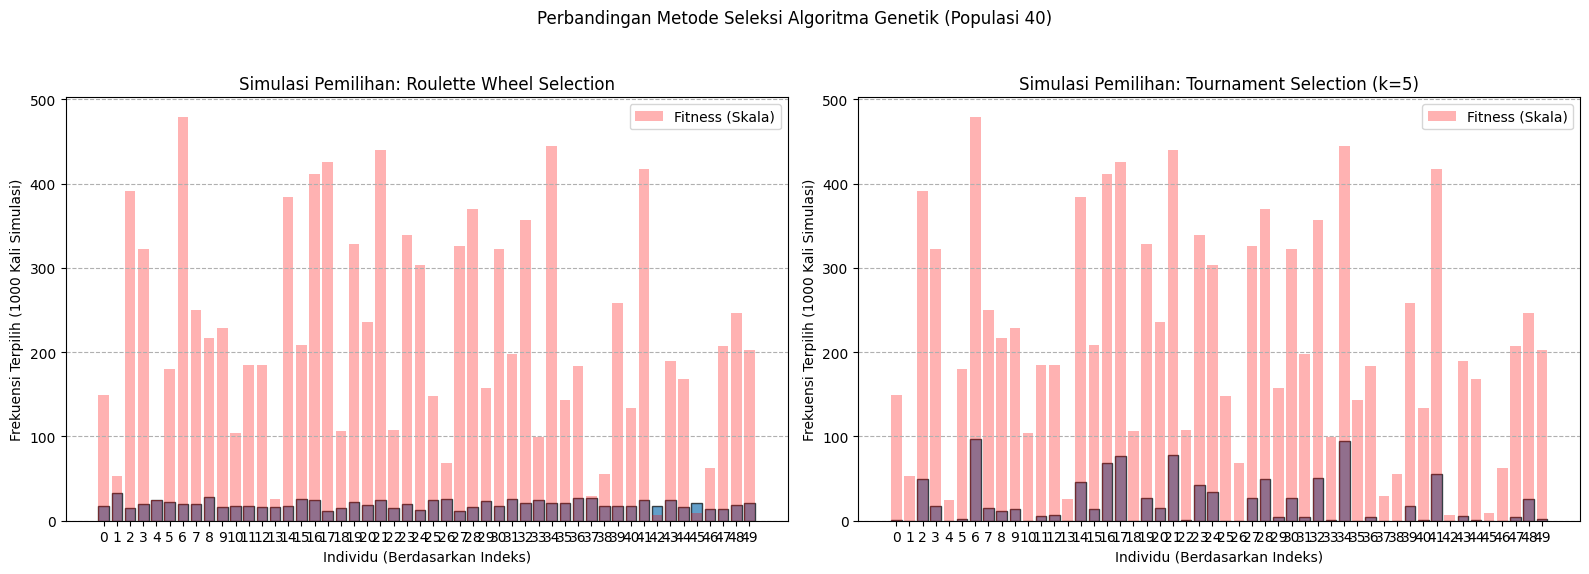


Analisis Output:
Tinggi batang biru menunjukkan seberapa sering individu tersebut terpilih sebagai 'orang tua'.
Batang merah (background) menunjukkan nilai Fitness awal individu tersebut (dikalikan 500 untuk skala visual).
- Roulette Wheel: Individu dengan Fitness tinggi memiliki probabilitas lebih tinggi untuk terpilih, tetapi individu yang relatif lemah masih memiliki kesempatan.
- Tournament Selection: Seleksi lebih agresif, berfokus pada individu terbaik (seringkali yang memiliki Fitness tertinggi) karena ia pasti memenangkan turnamen jika masuk.


In [6]:
# --- SIMULASI & PLOTTING SELEKSI (Output Grafik) ---

import numpy as np
import matplotlib.pyplot as plt
import random

# Define missing variables and functions from previous cells
UKURAN_POPULASI = 50 # Assuming this value from the previous cell
BATAS_GEN = [
    [0.0, 100.0],  # Kp
    [0.0, 50.0],   # Ki
    [0.0, 10.0]    # Kd
]

def seleksi_turnamen(populasi, list_fitness, ukuran_turnamen):
    """Memilih satu individu terbaik dari sekelompok acak."""
    indeks_terpilih = random.choices(range(len(populasi)), k=ukuran_turnamen)

    # Cari indeks dengan fitness terbaik di antara yang terpilih
    fitness_terbaik = -1
    pemenang_indeks = -1
    for i in indeks_terpilih:
        if list_fitness[i] > fitness_terbaik:
            fitness_terbaik = list_fitness[i]
            pemenang_indeks = i

    return populasi[pemenang_indeks]

# Placeholder for seleksi_roulette_wheel - needs actual implementation
def seleksi_roulette_wheel(populasi, list_fitness):
    """Placeholder for Roulette Wheel Selection."""
    # You'll need to implement the actual roulette wheel logic here
    # For now, returning a random individual as a placeholder
    return random.choice(populasi)


# 1. Inisialisasi Populasi Awal (Perintah 3.1)
populasi_awal = [[np.random.uniform(b[0], b[1]) for b in BATAS_GEN] for _ in range(UKURAN_POPULASI)]

# 2. Evaluasi Fitness (Perintah 3.2)
# Assuming hitung_fitness is defined elsewhere or needs to be added
# For now, using dummy fitness values for demonstration
# list_fitness_awal = [hitung_fitness(kromosom) for kromosom in populasi_awal]
list_fitness_awal = np.random.rand(UKURAN_POPULASI).tolist() # Dummy fitness for demonstration
indeks_populasi = np.arange(UKURAN_POPULASI)

# --- Simulasi ---
JUMLAH_SIMULASI = 1000 # Jumlah pasangan yang akan dipilih
hasil_turnamen = []
hasil_roulette = []

for _ in range(JUMLAH_SIMULASI):
    # Seleksi Tournament
    parent_t = seleksi_turnamen(populasi_awal, list_fitness_awal, ukuran_turnamen=5)
    # Find the index of the selected parent in the initial population
    try:
        hasil_turnamen.append(populasi_awal.index(parent_t))
    except ValueError:
        # Handle cases where the selected parent might not be directly in the initial_population list
        # This can happen with mutation/crossover in a real GA, but for pure selection simulation,
        # the selected parent should be one of the original individuals.
        # For this simulation, we assume the selected parent is from the initial population.
        pass


    # Seleksi Roulette Wheel
    parent_r = seleksi_roulette_wheel(populasi_awal, list_fitness_awal)
    # Find the index of the selected parent in the initial population
    try:
         hasil_roulette.append(populasi_awal.index(parent_r))
    except ValueError:
        # Same handling as for tournament selection if needed
        pass


# --- Plotting Hasil ---
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
bin_edges = np.arange(UKURAN_POPULASI + 1) - 0.5 # Batas bin untuk histogram

# Plot 1: Roulette Wheel Selection
axes[0].hist(hasil_roulette, bins=bin_edges, edgecolor='black', alpha=0.7, rwidth=0.8)
axes[0].bar(indeks_populasi, np.array(list_fitness_awal) * 500, color='red', alpha=0.3, label='Fitness (Skala)')
axes[0].set_title('Simulasi Pemilihan: Roulette Wheel Selection')
axes[0].set_xlabel('Individu (Berdasarkan Indeks)')
axes[0].set_ylabel('Frekuensi Terpilih (1000 Kali Simulasi)')
axes[0].legend(loc='upper right')
axes[0].grid(axis='y', linestyle='--')
axes[0].set_xticks(indeks_populasi)

# Plot 2: Tournament Selection
axes[1].hist(hasil_turnamen, bins=bin_edges, edgecolor='black', alpha=0.7, rwidth=0.8)
axes[1].bar(indeks_populasi, np.array(list_fitness_awal) * 500, color='red', alpha=0.3, label='Fitness (Skala)')
axes[1].set_title(f'Simulasi Pemilihan: Tournament Selection (k=5)')
axes[1].set_xlabel('Individu (Berdasarkan Indeks)')
axes[1].set_ylabel('Frekuensi Terpilih (1000 Kali Simulasi)')
axes[1].legend(loc='upper right')
axes[1].grid(axis='y', linestyle='--')
axes[1].set_xticks(indeks_populasi)

plt.suptitle("Perbandingan Metode Seleksi Algoritma Genetik (Populasi 40)")
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Analisis Singkat
print("\nAnalisis Output:")
print("Tinggi batang biru menunjukkan seberapa sering individu tersebut terpilih sebagai 'orang tua'.")
print("Batang merah (background) menunjukkan nilai Fitness awal individu tersebut (dikalikan 500 untuk skala visual).")
print("- Roulette Wheel: Individu dengan Fitness tinggi memiliki probabilitas lebih tinggi untuk terpilih, tetapi individu yang relatif lemah masih memiliki kesempatan.")
print("- Tournament Selection: Seleksi lebih agresif, berfokus pada individu terbaik (seringkali yang memiliki Fitness tertinggi) karena ia pasti memenangkan turnamen jika masuk.")

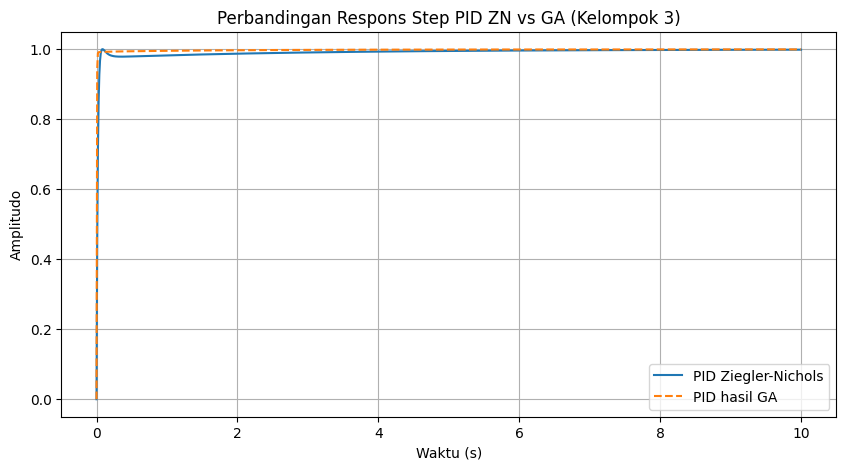

In [7]:
# --- PERBANDINGAN PID GA vs PID ZIEGLER-NICHOLS ---
# Contoh nilai hasil tuning Ziegler–Nichols (sesuaikan dari eksperimenmu)
Kp_ZN, Ki_ZN, Kd_ZN = 30, 10, 2  # ganti dengan hasilmu

Gcs_ZN = ct.tf([Kd_ZN, Kp_ZN, Ki_ZN], [1, 0])
Gcs_GA = ct.tf([Kd_opt, Kp_opt, Ki_opt], [1, 0])

Ts_ZN = ct.feedback(Gcs_ZN * Gps, 1)
Ts_GA = ct.feedback(Gcs_GA * Gps, 1)

T_sim = np.linspace(0, 10, 1000)
T1, y_ZN = ct.step_response(Ts_ZN, T_sim)
T2, y_GA = ct.step_response(Ts_GA, T_sim)

plt.figure(figsize=(10,5))
plt.plot(T1, y_ZN, label='PID Ziegler-Nichols')
plt.plot(T2, y_GA, label='PID hasil GA', linestyle='--')
plt.title("Perbandingan Respons Step PID ZN vs GA (Kelompok 3)")
plt.xlabel("Waktu (s)")
plt.ylabel("Amplitudo")
plt.legend()
plt.grid(True)
plt.show()
